In [2]:
# Dependencies
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import requests
import json
import seaborn as sns

In [16]:
# Name of the CSV file
file = 'inputs/004-Crime and Gun Statistics.csv'
file2 = 'output/ois_clean.csv'
file3 = "inputs/us census bureau regions and divisions.csv"

In [5]:
gun_stats = pd.read_csv(file)
gun_stats.head()

,State Name,Gun Murder Rate per 100K (2010),Gun Ownership (2007),"Violent Crime (per 100,000) 2013",Murder and nonnegligent manslaughter (per 100K) 2013,Forcible rape (per 100K) 2013,Robbery (per 100K) 2013,Aggravated assault (per 100K) 2013,Property Crime (per 100K) 2013,Burglary (per 100K) 2013,Larceny (per 100K) 2013,Motor Theft (per 100K) 2013
0,Alabama,2.8,51.70%,449.9,7.1,26.9,104.1,311.8,3502.2,984.7,2312.8,204.8
1,Alaska,2.7,57.80%,603.2,4.1,79.7,86.1,433.2,2739.4,403.3,2128.0,208.1
2,Arizona,3.6,31.10%,428.9,5.5,34.7,112.7,276.0,3539.2,807.8,2439.1,292.3
3,Arkansas,3.2,55.30%,469.1,5.9,42.3,78.7,342.3,3660.1,1081.3,2384.7,194.1
4,California,3.4,21.30%,423.1,5.0,20.6,148.6,248.9,2758.7,646.1,1669.5,443.2


In [6]:
#gun_stats=gun_stats['Gun Ownership (2007)'].astype('float')
gun_stats["Gun Ownership (2007)"] = gun_stats["Gun Ownership (2007)"].replace({'\%':''}, regex = True)
gun_stats.head()

,State Name,Gun Murder Rate per 100K (2010),Gun Ownership (2007),"Violent Crime (per 100,000) 2013",Murder and nonnegligent manslaughter (per 100K) 2013,Forcible rape (per 100K) 2013,Robbery (per 100K) 2013,Aggravated assault (per 100K) 2013,Property Crime (per 100K) 2013,Burglary (per 100K) 2013,Larceny (per 100K) 2013,Motor Theft (per 100K) 2013
0,Alabama,2.8,51.70,449.9,7.1,26.9,104.1,311.8,3502.2,984.7,2312.8,204.8
1,Alaska,2.7,57.80,603.2,4.1,79.7,86.1,433.2,2739.4,403.3,2128.0,208.1
2,Arizona,3.6,31.10,428.9,5.5,34.7,112.7,276.0,3539.2,807.8,2439.1,292.3
3,Arkansas,3.2,55.30,469.1,5.9,42.3,78.7,342.3,3660.1,1081.3,2384.7,194.1
4,California,3.4,21.30,423.1,5.0,20.6,148.6,248.9,2758.7,646.1,1669.5,443.2


In [7]:
gun_stats.columns


Index(['State Name', 'Gun Murder Rate per 100K (2010)', 'Gun Ownership (2007)',
       'Violent Crime  (per 100,000) 2013',
       'Murder and nonnegligent manslaughter (per 100K) 2013',
       'Forcible rape (per 100K) 2013', 'Robbery (per 100K) 2013',
       'Aggravated assault  (per 100K) 2013',
       'Property Crime  (per 100K) 2013', 'Burglary  (per 100K) 2013',
       'Larceny (per 100K) 2013', 'Motor Theft (per 100K) 2013'],
      dtype='object')

In [8]:
gun= gun_stats.rename(columns={"Gun Ownership (2007)":"Gun Ownership",'Violent Crime  (per 100,000) 2013':"Violent Crime" })
gun.head()                             
                             

,State Name,Gun Murder Rate per 100K (2010),Gun Ownership,Violent Crime,Murder and nonnegligent manslaughter (per 100K) 2013,Forcible rape (per 100K) 2013,Robbery (per 100K) 2013,Aggravated assault (per 100K) 2013,Property Crime (per 100K) 2013,Burglary (per 100K) 2013,Larceny (per 100K) 2013,Motor Theft (per 100K) 2013
0,Alabama,2.8,51.70,449.9,7.1,26.9,104.1,311.8,3502.2,984.7,2312.8,204.8
1,Alaska,2.7,57.80,603.2,4.1,79.7,86.1,433.2,2739.4,403.3,2128.0,208.1
2,Arizona,3.6,31.10,428.9,5.5,34.7,112.7,276.0,3539.2,807.8,2439.1,292.3
3,Arkansas,3.2,55.30,469.1,5.9,42.3,78.7,342.3,3660.1,1081.3,2384.7,194.1
4,California,3.4,21.30,423.1,5.0,20.6,148.6,248.9,2758.7,646.1,1669.5,443.2


In [9]:
oisdata = pd.read_csv(file2)
oisdata.head()

,Unnamed: 0,name,date,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,0,Tim Elliot,2015-01-02,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,1,Lewis Lee Lembke,2015-01-02,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,2,John Paul Quintero,2015-01-03,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,3,Matthew Hoffman,2015-01-04,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,4,Michael Rodriguez,2015-01-04,other,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [10]:
#state abbeviations dictionary
state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

In [70]:
gun['Gun Ownership'] = gun['Gun Ownership'].astype('float')


In [71]:
gb_oisdata = oisdata.groupby("state").count()
gb_oisdata.head()

,Unnamed: 0,name,date,armed,age,gender,race,city,signs_of_mental_illness,threat_level,flee,body_camera
state,,,,,,,,,,,,
AK,19,19,19,19,19,19,19,19,19,19,19,19
AL,63,63,63,63,63,63,63,63,63,63,63,63
AR,31,31,31,31,31,31,31,31,31,31,31,31
AZ,143,143,143,143,143,143,143,143,143,143,143,143
CA,463,463,463,463,463,463,463,463,463,463,463,463


In [64]:
np.corrcoef(gun['Violent Crime'], gb_oisdata['name'])

array([[1.        , 0.07156344],
       [0.07156344, 1.        ]])

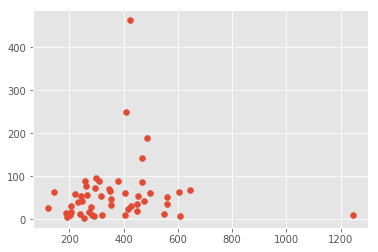

In [67]:
#matplotlib.style.use('ggplot')

#plt.scatter(gun['Violent Crime'], gb_oisdata['name'])
#plt.show()

In [72]:
np.corrcoef(gun['Gun Ownership'], gb_oisdata['name'])

array([[ 1.       , -0.0274148],
       [-0.0274148,  1.       ]])

In [ ]:
sns.lmplot( x="inc per 100k people", y="violent crime", data=gun, fit_reg=False, hue="region", legend=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


In [ ]:
sns.lmplot( x="inc per 100k people", y="Gun ownership", data=merged_poverty, fit_reg=False, hue="region", legend=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

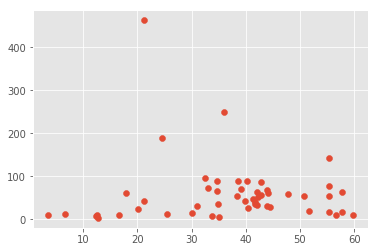

In [74]:
#plt.scatter(gun['Gun Ownership'], gb_oisdata['name'])
#plt.show()